# Summary

Derivation of Lagrangian correctly parameterized in terms of $v^x$ and $v^z$.

The derivation starts with the co-Finsler metric tensor $g_*^{ij}(\mathbf{r},\mathbf{\widetilde{p}})$, and its inverse, which gives the Finsler metric tensor $g_{ij}(\mathbf{r},\mathbf{\widetilde{p}})$, i.e., parameterized by position $\mathbf{r}$ and covector slowness $\mathbf{\widetilde{p}}$. 

### Preliminaries

In [1]:
import sympy as sy, numpy as np, os
sy.init_printing(pretty_print=True,wrap_line=True)
from sympy import simplify, trigsimp, expand, factor, powsimp, \
    Eq, solve, solveset, sqrt, diff, Matrix, det, tan, cos, sin, sec, csc, \
    Abs, Rational, pi, re, im, atan, atan2, numer, denom, \
    lambdify, log, collect, cancel, integrate, Integral, \
    nroots, poly, N

from gmplib.utils import e2d
from gme.symbols import *
from gme.equations import Equations

from gmplib.plot_utils import GraphingBase


from functools import reduce

from scipy.optimize import root_scalar
from scipy.linalg import norm

# Won't work for eta<1
# rdotz = symbols('v^z',  real=True, positive=True)

In [2]:
# from notebook.services.config import ConfigManager
# cm = ConfigManager().update('notebook', {'limit_output': 20000})

In [3]:
import matplotlib as mpl, matplotlib.pyplot as plt
mpl.rc('font', size=14, family='Arial')
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from matplotlib.ticker import MaxNLocator

gr = GraphingBase()
job_name = 'demo'

# Derivations

## Basics

In [4]:
eta_ = Rational(1,2)
gmeq = Equations( eta=eta_,  mu=eta_/2, beta_type='sin', do_raw=True )

In [5]:
vx = symbols(r'x',  real=True)
vz = symbols(r'z',  real=True)

In [6]:
varphi_ = 1

The velocity vector has a column form, while the slowness covector takes a row form:

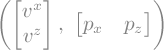

In [7]:
v_vec = Matrix([rdotx,rdotz])
p_covec = Matrix([px,pz]).T
v_vec,p_covec

## Leverage the metric tensor $g_*$

The co-Finsler metric $g_*^{ij}(\mathbf{r},\mathbf{\widetilde{p}})$ for the chosen $\eta=\tfrac{1}{2}$ or $\eta=\tfrac{3}{2}$, parameterized by position $\mathbf{r}$ and covector slowness $\mathbf{\widetilde{p}}$, aka defined on $\mathsf{T}^*\mathsf{M}$, is:

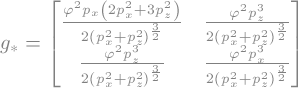

In [8]:
gstar_pxpz_eqn = simplify(gmeq.gstar_varphi_pxpz_eqn.subs({varphi_r:varphi}))
gstar_pxpz_eqn

Its inverse gives the dual metric $g_{ij}(\mathbf{r},\mathbf{\widetilde{p}})$, but still parameterized by position $\mathbf{r}$ and covector slowness $\mathbf{\widetilde{p}}$,

$
    g_*^{ij} = \left(g_{ij}\right)^{-1}
$

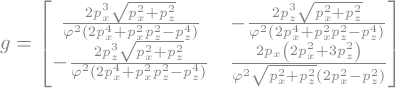

In [9]:
g_pxpz_eqn = simplify(Eq(g, gstar_pxpz_eqn.rhs.inv()))
g_pxpz_eqn

In [10]:
# simplify((g_pxpz_eqn.rhs)[1,0]*(gstar_pxpz_eqn.rhs)[1,0]+(g_pxpz_eqn.rhs)[1,1]*(gstar_pxpz_eqn.rhs)[1,1])

We can use $g_{ij}$ to lower the index of the velocity $v^j$ and map it into the slowness covector $p_i$:

$
    p_i = g_{ij} v^j
$

Contracting the metric tensor to the velocity gives the slowness:

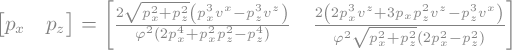

In [11]:
pcovec_eqn = Eq(p_covec, simplify(g_pxpz_eqn.rhs*v_vec).T)
# Eq(pcovec_eqn.lhs[0],pcovec_eqn.rhs[0]), Eq(pcovec_eqn.lhs[1],pcovec_eqn.rhs[1])
pcovec_eqn

Similarly, we can use $g^{ij}$ to raise the index of the slowness covector $p_i$ and map it into the velocity $v^j$:

$
    v^i = g^{ij} p_j
$

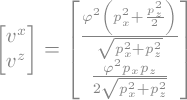

In [12]:
# gmeq.rdot_vec_eqn.subs({eta:gmeq.eta, varphi_r:varphi})
vvec_eqn = Eq(v_vec, simplify(p_covec*gstar_pxpz_eqn.rhs).T)
vvec_eqn

So we have the velocity vector $\mathbf{v}$ in terms of $\varphi(x)$ and the slowness covector $\mathbf{\widetilde{p}}$.  Writing each component out:

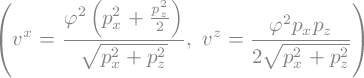

In [13]:
vx_px_pz_eqn = Eq(vvec_eqn.lhs[0],vvec_eqn.rhs[0])
vz_px_pz_eqn = Eq(vvec_eqn.lhs[1],vvec_eqn.rhs[1])
vx_px_pz_eqn, vz_px_pz_eqn

To check this result, we can solve the expressions for $\mathbf{\widetilde{p}}$ in terms of $\mathbf{v}$, which gives, e.g.,

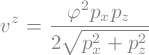

In [14]:
Eq(rdotz, solve(Eq(solve(Eq(pcovec_eqn.lhs[0],pcovec_eqn.rhs[0]),rdotx)[0],
          solve(Eq(pcovec_eqn.lhs[1],pcovec_eqn.rhs[1]),rdotx)[0]),rdotz)[0])

The (tangent of) the ray angle is given (by definition) by the ratio of these two components, which has the simple expression:

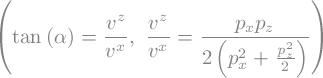

In [15]:
vzvx_ratio_eqn = Eq(vz_px_pz_eqn.lhs/vx_px_pz_eqn.lhs, vz_px_pz_eqn.rhs/vx_px_pz_eqn.rhs)
Eq(tan(alpha),vzvx_ratio_eqn.lhs), vzvx_ratio_eqn

## Expressions for $p_x(v^x,v^z)$ and $p_z(v^x,v^z)$ 

The velocity component ratio is a simple quadratic expression in the slowness components $p_x$ and $p_z$, which makes it easy to solve for one in terms of the other (along with the velocity components $v^x$ and $v^z$):

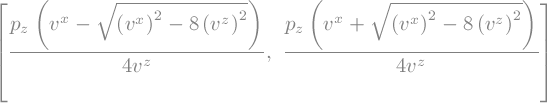

In [16]:
px_interim_solns = solve(vzvx_ratio_eqn,px)
px_interim_solns

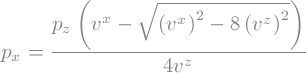

In [17]:
px_interim_soln = px_interim_solns[0]
px_interim_eqn = Eq(px, px_interim_soln)
px_interim_eqn

It will be useful to know the location, in both phase spaces, of a test point that lies "on-shell", i.e., on a solution of the system, which we set here. We can use this point to check the veracity of the expression for $p_x$:

In [18]:
if gmeq.eta<1:
    vx_,vz_ = 0.9,-0.2978
    px_,pz_ = 0.6630963505914919,-1.354973165538337
else:
    vx_,vz_ = Rational(105,100), Rational(21,100)
    vx_,vz_ = 1.05462010732076, 0.214847320357639
    px_,pz_ = 1.15,-1.
Eq(px, round(N(((px_interim_soln).subs({rdotx:vx_,rdotz:vz_}).subs({pz:pz_}))),5))

And also use it to check the expressions for $v^x$ and $v^z$:

In [19]:
vx_px_pz_eqn.subs({px:px_,pz:pz_,varphi:1}), vz_px_pz_eqn.subs({px:px_,pz:pz_,varphi:1})

The expression for $p_x$ in terms of $p_z$ and $(v^x,v^z)$ is linear in $p_z$; using it to eliminate $p_x$ in the expression for $v^x$ gives $v^x(v^z,p_z)$:

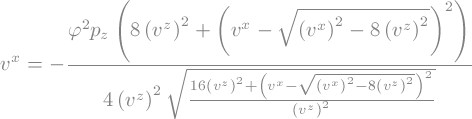

In [20]:
vx_eqn = (simplify( vx_px_pz_eqn.subs(e2d(px_interim_eqn)) ))
vx_eqn

Solving for $p_z$, which is just a simple rearrangement, gives $p_z(v^x,v^z)$:

In [60]:
pz_vx_vz_eqn = Eq(pz, simplify( solve(vx_eqn, pz)[0]))
pz_vx_vz_eqn
#.subs({rdotx:vx,rdotz:vz})
# pz_vx_vz_eqn = Eq(pz,sqrt(pzsqrd_vx_vz_eqn.rhs)
#                   *(1 if gmeq.eta<1 else -1)).subs({Abs(rdotz):rdotz}) 
# pz_vx_vz_eqn.subs({rdotx:vx,rdotz:vz})

# vx = symbols(r'x',  real=True)
if gmeq.eta<1:
    vz_tmp = symbols(r'v^z',  real=True, negative=True)
else:
    vz_tmp = symbols(r'v^z',  real=True, positive=True)
pz_vx_vz_simple_eqn = simplify(pz_vx_vz_eqn.subs({rdotz:vz_tmp}).subs({vz_tmp:rdotz}))

In [61]:
px_vx_vz_eqn = (px_interim_eqn.subs(e2d(pz_vx_vz_eqn)))
px_vx_vz_eqn #.subs({rdotx:vx,rdotz:vz})
px_vx_vz_simple_eqn = simplify(px_interim_eqn.subs(e2d(pz_vx_vz_simple_eqn)))

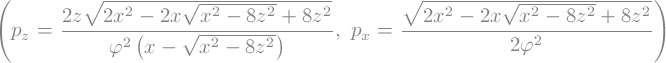

In [59]:
pz_vx_vz_simple_eqn.subs({rdotx:vx,rdotz:vz}), simplify(px_vx_vz_simple_eqn.subs({rdotx:vx,rdotz:vz}))

In [23]:
if gmeq.eta>1:
    px_vx_vz_eqn = px_vx_vz_simple_eqn
    pz_vx_vz_eqn = pz_vx_vz_simple_eqn

In [24]:
# pzsqrd_vx_vz_eqn = Eq(pz**2, simplify( solve(vx_px_pz_eqn.subs(e2d(px_interim_eqn)), pz**2)[0] ))
# pz_vx_vz_eqn = Eq(pz,sqrt(pzsqrd_vx_vz_eqn.rhs)
#                   *(1 if gmeq.eta<1 else -1)).subs({Abs(rdotz):rdotz}) 
# pz_vx_vz_eqn.subs({rdotx:vx,rdotz:vz})

In [25]:
# px_vx_vz_eqn = (px_interim_eqn.subs(e2d(pz_vx_vz_eqn)))
# px_vx_vz_eqn.subs({rdotx:vx,rdotz:vz})

In [26]:
Eq(pz, N(((pz_vx_vz_eqn.rhs)
        .subs({rdotx:vx_,rdotz:vz_})
        .subs({varphi:1,px:px_,pz:pz_}))))

In [27]:
Eq(px, N(((px_vx_vz_eqn.rhs)
        .subs({rdotx:vx_,rdotz:vz_})
        .subs({varphi:1,px:px_,pz:pz_}))) )

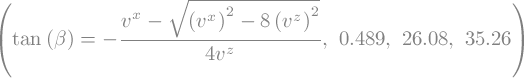

In [75]:
tanbeta_eqn = Eq(tan(beta), -px_vx_vz_eqn.rhs/pz_vx_vz_eqn.rhs)
( tanbeta_eqn, round(N(tanbeta_eqn.rhs.subs({rdotx:vx_,rdotz:vz_})),3), 
                 np.round(np.rad2deg(np.arctan(float(N(tanbeta_eqn.rhs.subs({rdotx:vx_,rdotz:vz_}))))),2),
                 np.round(np.rad2deg(np.arctan(float(N(gmeq.tanbeta_crit)))),2) )

In [29]:
if gmeq.eta<1:
    px_vx_vz_lambda = lambda f,vx,vz:  \
        float((N(px_vx_vz_eqn.rhs.subs({varphi:f,rdotx:vx,rdotz:vz}))))
    pz_vx_vz_lambda = lambda f,vx,vz:  \
        float((N(pz_vx_vz_eqn.rhs.subs({varphi:f,rdotx:vx,rdotz:vz}))))
else:
    px_vx_vz_lambda = lambda f,vx,vz:  \
        float(re(N(px_vx_vz_eqn.rhs.subs({varphi:f,rdotx:vx,rdotz:vz}))))
    pz_vx_vz_lambda = lambda f,vx,vz:  \
        float(re(N(pz_vx_vz_eqn.rhs.subs({varphi:f,rdotx:vx,rdotz:vz}))))
p_vx_vz_lambda = lambda f,v: [px_vx_vz_lambda(f,v[0],v[1]),pz_vx_vz_lambda(f,v[0],v[1])]

## Lagrangian $L(v^x,v^z,\varphi)$ using $p(v)$ mappings and Legendre transform

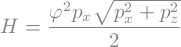

In [30]:
H_eqn = Eq(H, gmeq.H_eqn.rhs.subs({varphi_r:varphi, eta:gmeq.eta}))
H_eqn

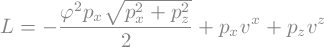

In [31]:
L_raw_eqn = simplify(Eq(L, px*rdotx + pz*rdotz - H_eqn.rhs))
L_raw_eqn

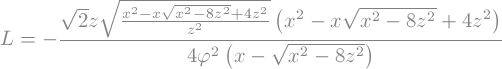

In [32]:
if gmeq.eta<1:
    L_interim_eqn = simplify( ((factor(L_raw_eqn.subs({px:-pz*tan(beta)}))).subs(e2d(tanbeta_eqn))
        .subs(e2d(px_vx_vz_eqn))).subs(e2d(pz_vx_vz_eqn)) )#.subs({rdotz:-Abs(rdotz)})
else:
    L_interim_eqn = simplify( ((factor(L_raw_eqn.subs({px:-pz*tan(beta)}))).subs(e2d(tanbeta_eqn))
        .subs(e2d(px_vx_vz_eqn))).subs(e2d(pz_vx_vz_eqn)) ).subs({rdotz:Abs(rdotz)})
L_interim_eqn.subs({rdotx:vx, rdotz:vz})

In [33]:
# L_interim_eqn = (L_prelim_eqn.subs(e2d(px_vx_vz_eqn)).subs(e2d(pz_vx_vz_eqn)))
# L_interim_eqn

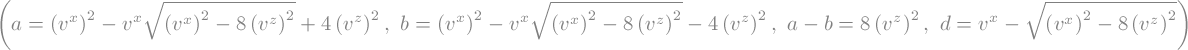

In [34]:
a = symbols(r'a',  real=True, positive=True)
b = symbols(r'b',  real=True, positive=True)
c = symbols(r'c',  real=True, positive=True)
d = symbols(r'd',  real=True, positive=True)
if gmeq.eta<1:
    a_subs_eqn = Eq(a, 
                    rdotx**2-rdotx*sqrt(rdotx**2-8*rdotz**2)+4*rdotz**2
                   )
    b_subs_eqn = Eq(b, 
                    rdotx**2-rdotx*sqrt(rdotx**2-8*rdotz**2)-4*rdotz**2
                   )
    c_subs_eqn = Eq(a-b, a_subs_eqn.rhs - b_subs_eqn.rhs)
    d_subs_eqn = Eq(d, 
                    rdotx-sqrt(rdotx**2-8*rdotz**2)
                   )
else:
    a_subs_eqn = Eq(a, 
                    sqrt(rdotx**2-24*rdotz**2)
                   )
    b_subs_eqn = Eq(b, 
                    sqrt(rdotx**2+24*rdotz**2)
                   )
    c_subs_eqn = Eq(a-b, a_subs_eqn.rhs - b_subs_eqn.rhs)
    d_subs_eqn = Eq(d, 
                    sqrt(16*rdotz**2+(a-rdotx)**2)
                   )
a_subs_eqn, b_subs_eqn, c_subs_eqn, d_subs_eqn

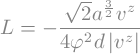

In [35]:
L_ab_eqn = Eq( L, simplify(simplify( (L_interim_eqn.rhs)
                                   .subs(e2d(a_subs_eqn,do_flip=True)).subs(e2d(b_subs_eqn,do_flip=True)) )
                          .subs(e2d(c_subs_eqn,do_flip=False)).subs(e2d(d_subs_eqn,do_flip=True))) )
# L_ab_eqn = Eq( L, simplify(L_ab_eqn.rhs.subs({Abs(rdotz):-rdotz})))
L_ab_eqn

In [36]:
# L_ab_eqn.subs({sqrt((16*rdotz**2+(rdotx-sqrt(rdotx**2-8*rdotz**2)**2))/rdotz**2):})

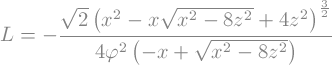

In [37]:
if gmeq.eta<1:
    L_manipulated_eqn = factor(((
        L_ab_eqn.subs(e2d(a_subs_eqn,do_flip=False))
                .subs(e2d(b_subs_eqn,do_flip=False))
                .subs(e2d(d_subs_eqn,do_flip=False))
    )))
    L_manipulated_eqn = ( L_manipulated_eqn.subs({Abs(rdotz):-rdotz}) )
else:
    L_manipulated_eqn = (((
        L_ab_eqn.subs(e2d(d_subs_eqn,do_flip=False))
                .subs(e2d(a_subs_eqn,do_flip=False))
                .subs(e2d(b_subs_eqn,do_flip=False))
    )))
    L_manipulated_eqn = simplify( L_manipulated_eqn.subs({Abs(rdotz):rdotz}) )
#     L_eqn = simplify( L_interim_eqn.subs({Abs(rdotz):rdotz}) )
L_manipulated_eqn.subs({rdotx:vx, rdotz:vz})

## Lagrangian $L$ in compact form

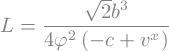

In [38]:
if gmeq.eta<1:
    a_subs_eqn = Eq(a, sqrt(rdotx**2-rdotx*sqrt(rdotx**2-8*rdotz**2)-4*rdotz**2))
    b_subs_eqn = Eq(b, sqrt(rdotx**2-rdotx*sqrt(rdotx**2-8*rdotz**2)+4*rdotz**2))
    b2_subs_eqn = Eq(b*sqrt(2), sqrt(2*rdotx**2-2*rdotx*sqrt(rdotx**2-8*rdotz**2)+8*rdotz**2))
    c_subs_eqn = Eq(c, sqrt(rdotx**2-8*rdotz**2))
    c2_subs_eqn = Eq(c*sqrt(2), sqrt(2*rdotx**2-16*rdotz**2))
    L_temp_eqn = simplify(L_manipulated_eqn
                     .subs(e2d(a_subs_eqn,do_flip=True))
                     .subs(e2d(b_subs_eqn,do_flip=True))
                     .subs(e2d(b2_subs_eqn,do_flip=True))
#                      .subs(e2d(c_subs_eqn,do_flip=True)) 
                    ).subs(e2d(c_subs_eqn,do_flip=True)).subs(e2d(c2_subs_eqn,do_flip=True))
else:
    a_subs_eqn = Eq(a, sqrt(rdotx**2-24*rdotz**2) )
    b_subs_eqn = Eq(b, sqrt(rdotx**2+24*rdotz**2) )
#     b2_subs_eqn = Eq(b*sqrt(2), sqrt(2*rdotx**2-2*rdotx*sqrt(rdotx**2-8*rdotz**2)+8*rdotz**2))
    c_subs_eqn = Eq(c, sqrt(16*rdotz**2+(a-rdotx)**2) )
    L_temp_eqn = (L_manipulated_eqn
                     .subs(e2d(a_subs_eqn,do_flip=True))
                     .subs(e2d(b_subs_eqn,do_flip=True))
#                      .subs(e2d(b2_subs_eqn,do_flip=True))
                     .subs(e2d(c_subs_eqn,do_flip=True)) 
                    )
L_temp_eqn

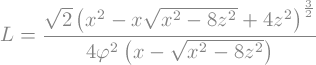

In [39]:
L_compact_eqn = (L_temp_eqn
                   .subs(e2d(c_subs_eqn,do_flip=False))
                   .subs(e2d(b_subs_eqn,do_flip=False))
                   .subs(e2d(a_subs_eqn,do_flip=False)) )
(L_compact_eqn.subs({rdotx:vx,rdotz:vz}))

In [40]:
px_,pz_,vx_,vz_ 

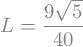

In [41]:
L_compact_eqn.subs({rdotx:(Rational(9,10) if gmeq.eta<1 else Rational(105,100)),
                    rdotz:(Rational(3,10) if gmeq.eta<1 else Rational(21,100)),varphi:varphi_})

In [42]:
# L_lambda = lambda f,vx,vz: float(re(N(L_decompact_eqn.rhs.subs({varphi:f,rdotx:vx,rdotz:vz}))))
# L_lambda = lambda f_,vx_,vz_: float(re(N(L_interim_eqn.rhs.subs({varphi:f_,rdotx:vx_,rdotz:vz_}))))
L_raw_lambda = lambda f_,px_,pz_,vx_,vz_: \
                    float((N(L_raw_eqn.rhs.subs({varphi:f_,px:px_,pz:pz_,rdotx:vx_,rdotz:vz_}))))
# L_lambda = lambda f_,vx_,vz_: float((N(L_interim_eqn.rhs.subs({varphi:f_,rdotx:vx_,rdotz:vz_}))))
L_lambda = lambda f_,vx_,vz_: float((N(L_interim_eqn.rhs.subs({varphi:f_,rdotx:vx_,rdotz:vz_}))))

## Geodesic coefficients  $G^i$

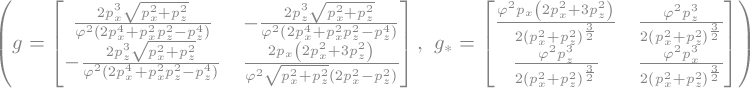

In [43]:
g_pxpz_eqn, gstar_pxpz_eqn

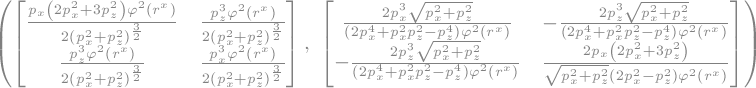

In [44]:
gstar_pxpz = gstar_pxpz_eqn.rhs.subs({varphi:varphi_rx})
g_pxpz = g_pxpz_eqn.rhs.subs({varphi:varphi_rx})
gstar_pxpz, g_pxpz

In [45]:
def diff_p(g_,r_i):
    dg11dri = diff(g_[0,0],r_i)
    dg12dri = diff(g_[0,1],r_i)
    dg21dri = diff(g_[1,0],r_i)
    dg22dri = diff(g_[1,1],r_i)
    return simplify(Matrix([ [dg11dri,dg12dri], [dg21dri,dg22dri] ]))

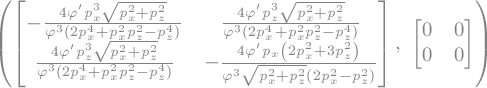

In [46]:
dgdrx = diff_p(g_pxpz,rx).subs({diff(varphi_rx,rx):d_varphi, varphi_rx:varphi})
dgdrz = diff_p(g_pxpz,rz).subs({diff(varphi_rx,rx):d_varphi, varphi_rx:varphi})
dgdrx, dgdrz

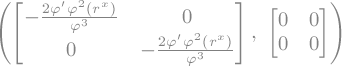

In [47]:
gstar_im_dgdrx_jm = simplify(gstar_pxpz*dgdrx)
gstar_im_dgdrz_jm = simplify(gstar_pxpz*dgdrz)
gstar_im_dgdrx_jm, gstar_im_dgdrz_jm

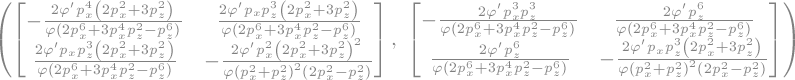

In [48]:
gstar_1m_dgrm_jk = simplify(gstar_pxpz[0,0]*dgdrx + gstar_pxpz[0,1]*dgdrz) \
                                    .subs({diff(varphi_rx,rx):d_varphi, varphi_rx:varphi})
gstar_2m_dgrm_jk = simplify(gstar_pxpz[1,0]*dgdrx + gstar_pxpz[1,1]*dgdrz) \
                                    .subs({diff(varphi_rx,rx):d_varphi, varphi_rx:varphi})
gstar_1m_dgrm_jk, gstar_2m_dgrm_jk

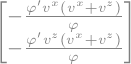

In [49]:
gstar_im_dgdrk_jm_vjvk = simplify( Rational(1,2)*((v_vec.T*gstar_im_dgdrx_jm*v_vec[0])
                                                 +(v_vec.T*gstar_im_dgdrx_jm*v_vec[1])) ).T \
                                    .subs({diff(varphi_rx,rx):d_varphi, varphi_rx:varphi})
gstar_im_dgdrk_jm_vjvk

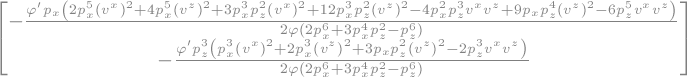

In [50]:
gstar_im_dgdrm_jk_vjvk = Matrix([ simplify( Rational(1,4)*((v_vec.T*(gstar_1m_dgrm_jk*v_vec))[0]) ),
                                  simplify( Rational(1,4)*((v_vec.T*(gstar_2m_dgrm_jk*v_vec))[0]) ) ])
gstar_im_dgdrm_jk_vjvk

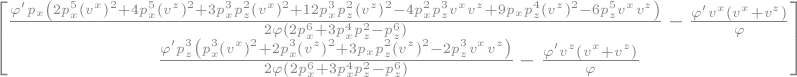

In [51]:
G_i_pxpz = (factor(gstar_im_dgdrk_jm_vjvk - gstar_im_dgdrm_jk_vjvk))
G_i_pxpz

In [52]:
G_i_vxvz = ( ( G_i_pxpz.subs(e2d(px_vx_vz_eqn)).subs(e2d(pz_vx_vz_eqn)) ).subs({rdotx:vx,rdotz:vz}) )

In [53]:
Gi = MatrixSymbol(r'G^i',2,1)
G1 = symbols(r'G^1', real=True)
G2 = symbols(r'G^2', real=True)

In [54]:
a = symbols(r'a',  real=True)
b = symbols(r'b',  real=True)
if gmeq.eta<1:
    a_subs_eqn = Eq(a,sqrt(vx**2-8*vz**2))
else:
    a_subs_eqn = Eq(a,sqrt(vx**2-24*vz**2))
# b_subs_eqn = Eq(b,vx**2-x*sqrt(vx**2-8*vz**2)+4*z**2)
# b_subs_eqn = Eq(b,-a*x+x**2+4*z**2)
# e2d(a_subs_eqn,do_flip=True) #, e2d(b_subs_eqn,do_flip=True)

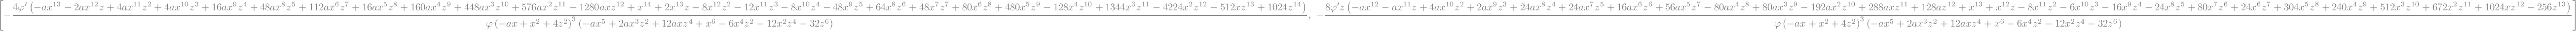

In [56]:
if gmeq.eta<1:
    G_i_vxvz_a = [
        ( factor((G_i_vxvz[0])).subs(e2d(a_subs_eqn,do_flip=True)) ),
        ( factor((G_i_vxvz[1])).subs(e2d(a_subs_eqn,do_flip=True)) )
    ]
else:
    G_i_vxvz_a = [
        ( simplify((G_i_vxvz[0])).subs(e2d(a_subs_eqn,do_flip=True)) ),
        ( simplify((G_i_vxvz[1])).subs(e2d(a_subs_eqn,do_flip=True)) )
    ]
G_i_vxvz_eqn = Eq(Gi, Matrix([G_i_.subs(e2d(a_subs_eqn,do_flip=False)) for G_i_ in G_i_vxvz_a]))
G_i_vxvz_a

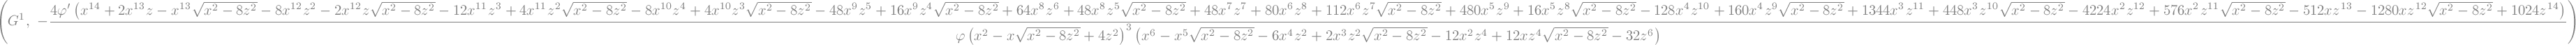

In [57]:
G1, G_i_vxvz_eqn.rhs[0]

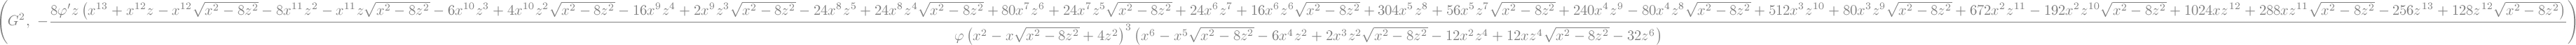

In [58]:
G2, G_i_vxvz_eqn.rhs[1]

# Tests

## Rederivation of metric tensor $g$ from $L$

In [ ]:
sub_ = {rdotx:vx_, rdotz:vz_, px:px_,pz:pz_, varphi:varphi_}
sub_

In [ ]:
L_ = L_compact_eqn.rhs
L_.subs({rdotx:vx, rdotz:vz})

Differentiate $L = \tfrac{1}{2}F^2$ with respect to velocity $v$, remembering that $\varphi(x)$ is a function of horizontal position $x$ only, and is not dependent on $v$.

In [ ]:
dLdv = Matrix([ diff(L_,rdotx), diff(L_,rdotz) ]) 
d2Ldvxdvx = diff(dLdv[0],rdotx)
d2Ldvxdvz = diff(dLdv[0],rdotz)
d2Ldvzdvx = diff(dLdv[1],rdotx)
d2Ldvzdvz = diff(dLdv[1],rdotz)
d2Ldv2 = (Matrix([[d2Ldvxdvx,d2Ldvxdvz],[d2Ldvzdvx,d2Ldvzdvz]]))
g_from_L_eqn = simplify(Eq(g, d2Ldv2))

In [ ]:
g_p_ = g_pxpz_eqn.subs(sub_)
g_p_

In [ ]:
g_v_ = Eq(g, N(g_from_L_eqn.rhs.subs(sub_)))
g_v_

In [ ]:
g_v_.rhs - g_p_.rhs

In [ ]:
px_alt_, pz_alt_ = 0.7, -1
vx_alt_ = vx_px_pz_eqn.rhs.subs({px:px_alt_,pz:pz_alt_,varphi:varphi_})
vz_alt_ = vz_px_pz_eqn.rhs.subs({px:px_alt_,pz:pz_alt_,varphi:varphi_})
vx_alt_,vz_alt_
sub_alt_ = {rdotx:vx_alt_, rdotz:vz_alt_, px:px_alt_,pz:pz_alt_, varphi:varphi_}
sub_alt_

In [ ]:
g_p_ = g_pxpz_eqn.subs(sub_alt_)
g_p_

In [ ]:
g_v_ = Eq(g, N(g_from_L_eqn.rhs.subs(sub_alt_)))
g_v_

In [ ]:
g_v_.rhs - g_p_.rhs

## Local tests

In [ ]:
round(N(px_vx_vz_eqn.rhs.subs({rdotx:vx_,rdotz:vz_,varphi:varphi_})),3), \
round(N(pz_vx_vz_eqn.rhs.subs({rdotx:vx_,rdotz:vz_,varphi:varphi_})),3)

In [ ]:
px_ = N(px_vx_vz_eqn.rhs.subs({rdotx:vx_,rdotz:vz_}).subs({varphi:varphi_}))
pz_ = N(pz_vx_vz_eqn.rhs.subs({rdotx:vx_,rdotz:vz_}).subs({varphi:varphi_}))
px_, pz_

In [ ]:
px_ = px_vx_vz_lambda(varphi_,vx_,vz_)
pz_ = pz_vx_vz_lambda(varphi_,vx_,vz_)
px_, pz_

In [ ]:
Matrix([px_,pz_]).dot(Matrix([vx_,vz_]))

In [ ]:
sub_ = {rdotx:vx_,rdotz:vz_,varphi:varphi_, px:px_, pz:pz_}

In [ ]:
Matrix([
    N(L_raw_eqn.subs(sub_)), 
    Eq(L,L_raw_lambda(varphi_,px_,pz_,vx_,vz_)),
    N(L_interim_eqn.subs(sub_)), 
    N(L_manipulated_eqn.subs(sub_)), 
    N(L_compact_eqn.subs(sub_)), 
    Eq(L,L_lambda(varphi_,vx_,vz_))
])

## Indicatrix/figuratrix tests

In [ ]:
if gmeq.eta<1:
    varphi_plot_ = 1
else:
    varphi_plot_ = 1

In [ ]:
sub_plot_ = {varphi_r:varphi_plot_, eta:gmeq.eta}

In [ ]:
H_lambdified = lambdify([varphi,px,pz],H_eqn.rhs)
H_lambda = lambda f_,px_,pz_: float(N(H_lambdified(f_,px_,pz_)))

In [ ]:
H_parametric_eqn = Eq((2*gmeq.H_eqn.rhs)**2,1).subs(sub_plot_)
px_H_solns = [simplify(sqrt(soln)) for soln in solve( H_parametric_eqn ,px**2)]
pz_H_solns = [simplify(sqrt(soln)).subs({Abs(px):px}) for soln in solve( H_parametric_eqn ,pz**2)]
px_H_soln_ = [soln for soln in px_H_solns if Abs(sy.im(N(soln.subs({pz:1}))))<1e-10][0]
px_H_lambda = lambdify( [pz], simplify(px_H_soln_) )
numer(simplify(px_H_soln_))

In [ ]:
pz_min_eqn = Eq(pz_min, 0)
px_min_eqn = Eq(px_min, 
                sqrt(solve(Eq((
                solve(Eq(4*gmeq.H_eqn.rhs**2,1).subs(sub_plot_),pz**2)[:])[0],0)
                               ,px**2)[1]))
tanbeta_max_eqn = Eq(tan(beta_max),sy.oo)
tanbeta_max = None
px_min_ = round(float(N(px_min_eqn.rhs.subs(sub_plot_))),4)
pz_min_ = round(float(N(pz_min_eqn.rhs.subs(sub_plot_))),8)
px_min_, -pz_min_, np.rad2deg(np.arctan(px_min_/pz_min_)) if pz_min_>0 else None

In [ ]:
v_from_gstar_lambda_tmp = lambdify((px,pz),
                N(gmeq.gstar_varphi_pxpz_eqn.subs(sub_plot_).rhs*Matrix([px,pz])))
v_from_gstar_lambda = lambda px_,pz_: (v_from_gstar_lambda_tmp(px_,pz_)).flatten()
v_lambda = lambda pa: np.array([(v_from_gstar_lambda(px_,pz_)) for px_,pz_ in pa])
# gmeq.gstar_varphi_pxpz_eqn

In [ ]:
if gmeq.eta==Rational(3,2):
    pz_max_ = 100
else:
    pz_max_ = 50
pz_array = -10**np.linspace(np.log10(pz_min_ if pz_min_>0 else 1e-1), np.log10(pz_max_), 50)
px_array = px_H_lambda(pz_array)
p_array = np.vstack([px_array,pz_array]).T
p_array = p_array[np.isfinite(p_array[:,0]) & np.isfinite(p_array[:,1])]

modp_array = norm(p_array,axis=0)
tanbeta_crit = float(N(gmeq.tanbeta_crit_eqn.rhs.subs({eta:gmeq.eta})))

p_infc_array = p_array[np.abs(p_array[:,0]/p_array[:,1])<tanbeta_crit]
p_supc_array = p_array[np.abs(p_array[:,0]/p_array[:,1])>=tanbeta_crit]

v_infc_array = v_lambda(p_infc_array)
v_supc_array = v_lambda(p_supc_array)
v_array = v_lambda(p_array)
# v_array

In [ ]:
p_from_v_array = np.array([p_vx_vz_lambda(varphi_plot_,v_) for v_ in v_array[::1]])
len(p_from_v_array), len(p_array)

In [ ]:
p_from_v_trunc_raw_array = p_from_v_array[np.isfinite((p_from_v_array[:,0])) 
                                          & np.isfinite((p_from_v_array[:,1]))]
v_from_v_trunc_raw_array = v_array[np.isfinite((p_from_v_array[:,0])) 
                                   & np.isfinite((p_from_v_array[:,1]))]
len(p_from_v_trunc_raw_array), len(v_from_v_trunc_raw_array)

In [ ]:
p_trunc1_array = p_from_v_trunc_raw_array[1:]
p_trunc0_array = p_from_v_trunc_raw_array[:-1]
p_trunc1_array-p_trunc0_array
p_from_v_trunc_array = p_trunc0_array[(p_trunc1_array[:,1]-p_trunc0_array[:,1])<0]
v_trunc0_array = v_from_v_trunc_raw_array[:-1]
v_from_v_trunc_array = v_trunc0_array[(p_trunc1_array[:,1]-p_trunc0_array[:,1])<0]

In [ ]:
p_from_v_infc_array = p_from_v_trunc_array[np.abs(p_from_v_trunc_array[:,0]
                                            /p_from_v_trunc_array[:,1])<tanbeta_crit]
p_from_v_supc_array = p_from_v_trunc_array[np.abs(p_from_v_trunc_array[:,0]
                                            /p_from_v_trunc_array[:,1])>=tanbeta_crit]

In [ ]:
[np.round(np.dot(p_,v_),3) for p_,v_ in (zip(p_from_v_infc_array,v_infc_array))]

In [ ]:
[np.round(np.dot(p_,v_),3) for p_,v_ in (zip(p_infc_array,v_infc_array))]

In [ ]:
[round(p_[0]*v_[0]+p_[1]*v_[1],3) for p_,v_ in (zip(p_infc_array,v_infc_array))]

In [ ]:
[np.round(H_lambda(varphi_plot_, px_,pz_),4) for px_,pz_ in p_from_v_infc_array]

In [ ]:
[np.round(H_lambda(varphi_plot_, px_,pz_),4) for px_,pz_ in p_infc_array]

In [ ]:
H_eqn, L_raw_eqn

In [ ]:
[round(H_eqn.rhs.subs({varphi:varphi_plot_,px:px_,pz:pz_}),2) 
         for [px_,pz_],[vx_,vz] in zip(p_infc_array,v_infc_array)]

In [ ]:
[round((px*rdotx+pz*rdotz).subs({px:p_[0],pz:p_[1],rdotx:v_[0],rdotz:v_[1]}),3) 
         for (p_,v_) in zip(p_infc_array,v_infc_array)]

In [ ]:
[np.round(L_raw_lambda(varphi_plot_, *p_,*v_),4) 
         for (p_,v_) in zip(p_infc_array,v_infc_array)]

In [ ]:
# [np.round(L_lambda(varphi_, *v_),4) for v_ in v_infc_array]

# Plot

In [ ]:
fig = gr.create_figure(job_name+'_Fstar_F_rectlinear', fig_size=(7,7))
plt.plot(p_supc_array[:,0],p_supc_array[:,1], 'Blue', lw=2, ls='-', 
         label=r'$F^*\!\!=1$,  $\beta\geq\beta_\mathrm{c}$')
plt.plot(p_infc_array[:,0],p_infc_array[:,1], 'DarkBlue', lw=2, ls='-', 
         label=r'$F^*\!\!=1$,  $\beta<\beta_\mathrm{c}$')

plt.plot(p_from_v_supc_array[:,0],p_from_v_supc_array[:,1], 'Blue', lw=4, ls='-', 
         label=r'$F^*\!\!=1$,  $\beta\geq\beta_\mathrm{c}$')
plt.plot(p_from_v_infc_array[:,0],p_from_v_infc_array[:,1], 'DarkBlue', lw=4, ls=':', 
         label=r'$F^*\!\!=1$,  $\beta<\beta_\mathrm{c}$')

plt.plot(v_supc_array[:,0],v_supc_array[:,1], 'Red', lw=2, ls='-', 
         label=r'$F=1$,  $\beta\geq\beta_\mathrm{c}$')
# plt.plot([0,vx_abcrit_],[0,vz_abcrit_], 
#          '-.', color='DarkRed', lw=1, label=r'$\alpha_{\mathrm{c}}$')
plt.plot(v_infc_array[:,0],v_infc_array[:,1], 'DarkRed', lw=2, 
         ls='-', 
         label=r'$F=1$,  $\beta<\beta_\mathrm{c}$')
plt.xlabel(r'$p_x$ (for $F^*$)  or  $v^x$ (for $F$)', fontsize=14)
plt.ylabel(r'$p_z$ (for $F^*$)  or  $v^z$ (for $F$)', fontsize=14)
plt.xlim(0,2)
plt.ylim(-3,0.5);
plt.plot(px_,pz_,'o')
px_,pz_

In [ ]:
gmeq.eta